Task 1. Solve classification task

In [34]:
# Rakymzhan Zhabagin, ID: 21B030339

First Second name PLEASE


In [35]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
from torch.utils.data import DataLoader,Dataset
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Data preparation

In [36]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [37]:
ds = tfds.load('beans', split='train', shuffle_files=True)

In [38]:
ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(500, 500, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [39]:
df = tfds.as_dataframe(ds)

In [40]:
df.head()

,image,label
0,"[[[149, 132, 106], [141, 124, 98], [134, 118, ...",1
1,"[[[129, 118, 88], [95, 81, 54], [84, 66, 46], ...",1
2,"[[[64, 88, 14], [65, 89, 15], [66, 88, 15], [6...",0
3,"[[[93, 109, 83], [96, 112, 86], [97, 115, 91],...",1
4,"[[[78, 103, 46], [86, 102, 53], [103, 103, 67]...",2


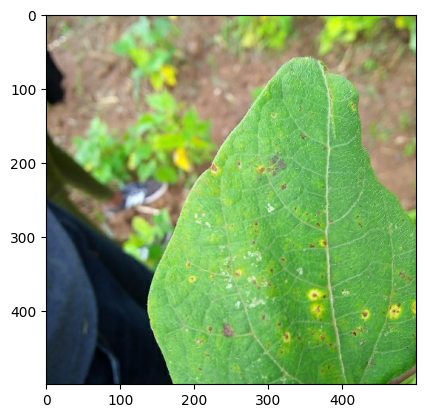

In [41]:
plt.imshow(df['image'][0], cmap='gray')

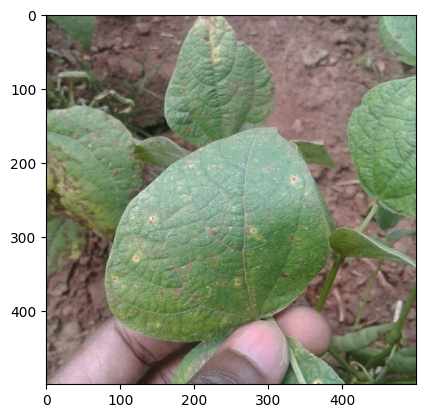

In [42]:
plt.imshow(df['image'][3], cmap='gray')

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(df['image']), np.array(df['label']), test_size=0.2, random_state=10)

In [44]:
#your code here
len(X_train)

827

In [45]:
len(y_train)

827

Size of the input image: (500, 500, 3)
Number of classes: 3
Class names: [0 1 2]


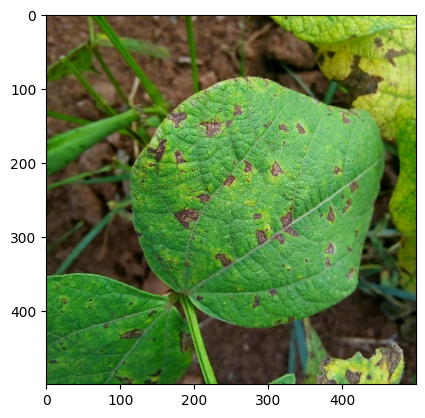

In [46]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
from torch.utils.data import DataLoader, Dataset
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

# Loading of the dataset and split
ds = tfds.load('beans', split='train', shuffle_files=True)
df = tfds.as_dataframe(ds)
plt.imshow(df['image'][0], cmap='gray')
plt.imshow(df['image'][3], cmap='gray')
X_train, X_test, y_train, y_test = train_test_split(np.array(df['image']), np.array(df['label']), test_size=0.2, random_state=10)

# Size of the input image
print("Size of the input image:", X_train[0].shape)

# Load dataset
ds = tfds.load('beans', split='train', shuffle_files=True)
df = tfds.as_dataframe(ds)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(df['image']), np.array(df['label']), test_size=0.2, random_state=10)

# Print number of classes and their names
num_classes = len(np.unique(y_train))
class_names = np.unique(df['label'].values)

class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = Image.fromarray(self.images[idx])
        label = torch.tensor(self.labels[idx], dtype=torch.long)

        if self.transform:
            img = self.transform(img)

        return img, label

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
    transforms.Resize((128, 128))
])

# C datasets
train_dataset = CustomDataset(X_train, y_train, transform=transform)
test_dataset = CustomDataset(X_test, y_test, transform=transform)

# DataLoader instances
trainloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

print("Number of classes:", num_classes)
print("Class names:", class_names)

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MyConvNet(nn.Module):
    def __init__(self):
        super(MyConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(32 * 32 * 32, 128)  # Adjusted size based on the output of conv2
        self.fc2 = nn.Linear(128, 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

model = MyConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, criterion, optimizer, num_epochs=16):
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2%}')

    print('Finished Training')

train_model(model, trainloader, criterion, optimizer, num_epochs=16)


Epoch [1/16], Loss: 0.8815, Accuracy: 60.58%
Epoch [2/16], Loss: 0.5692, Accuracy: 76.18%
Epoch [3/16], Loss: 0.3348, Accuracy: 86.34%
Epoch [4/16], Loss: 0.1365, Accuracy: 94.92%
Epoch [5/16], Loss: 0.0735, Accuracy: 97.70%
Epoch [6/16], Loss: 0.0524, Accuracy: 98.43%
Epoch [7/16], Loss: 0.0127, Accuracy: 99.76%
Epoch [8/16], Loss: 0.0015, Accuracy: 100.00%
Epoch [9/16], Loss: 0.0006, Accuracy: 100.00%
Epoch [10/16], Loss: 0.0003, Accuracy: 100.00%
Epoch [11/16], Loss: 0.0002, Accuracy: 100.00%
Epoch [12/16], Loss: 0.0002, Accuracy: 100.00%
Epoch [13/16], Loss: 0.0001, Accuracy: 100.00%
Epoch [14/16], Loss: 0.0001, Accuracy: 100.00%
Epoch [15/16], Loss: 0.0001, Accuracy: 100.00%
Epoch [16/16], Loss: 0.0001, Accuracy: 100.00%
Finished Training


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import torch
import numpy as np

# Setting device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.eval()  # Setting the model to evaluation mode
y_true = []  # Ground truth labels
y_pred = []  # Predicted

with torch.no_grad():
    for i, batch in enumerate(testloader):
        X_test_batch, y_test_batch = batch
        X_test_batch = X_test_batch.to(device=device, dtype=torch.float32)
        y_test_pred = model(X_test_batch)

        y_true.extend(y_test_batch.cpu().numpy())
        y_pred.extend(y_test_pred.cpu().detach())

# Converting our lists to NumPy arrays
test = np.array(y_true)

# Getting the predicted class labels
pred = np.argmax(np.array([tensor.numpy() for tensor in y_pred]), axis=1)

Baseline accuracy more than 70 for all of classes AND more than 35 for each (7 points)

In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test, pred))
from sklearn.metrics import classification_report
print(classification_report(test, pred))

[[52 12  1]
 [27 44  8]
 [ 2  5 56]]
              precision    recall  f1-score   support

           0       0.64      0.80      0.71        65
           1       0.72      0.56      0.63        79
           2       0.86      0.89      0.88        63

    accuracy                           0.73       207
   macro avg       0.74      0.75      0.74       207
weighted avg       0.74      0.73      0.73       207



Accroding to this, accuracy is more than 70 for all of classes AND more than 35 for each one.

(3 points) Write a function for classification of one image:
<br> Input: 1 image from dataset
<br> Output: predicted class, target class and comparison

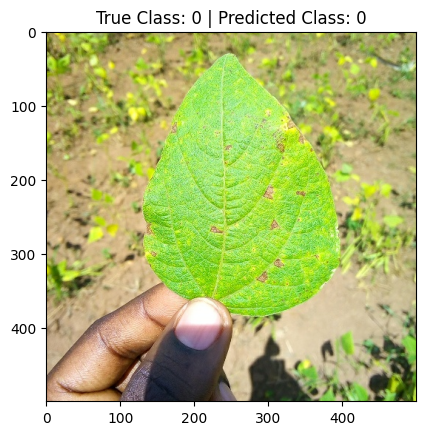

Image 7:
Predicted Class: 0 | True Class: 0
Correct Prediction: True



In [59]:
#your code here

from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch

def classify_single_image(image_path, model, transform, class_names):
    # Loading and preprocessing the image
    img = Image.fromarray(image_path)
    img = img.resize((256, 256))
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

    # Makinging prediction
    model.eval()
    with torch.no_grad():
        img_tensor = img_tensor.to(device)
        prediction = model(img_tensor)

    # Converting prediction to class label
    predicted_class = torch.argmax(prediction).item()

    # Display the image
    plt.imshow(Image.fromarray(image_path))
    plt.title(f"True Class: {class_names[y_test[image_index]]} | Predicted Class: {class_names[predicted_class]}")
    plt.show()

    return predicted_class, y_test[image_index], predicted_class == y_test[image_index]

# Usage example:
image_index = 7
image_path = X_test[image_index]

predicted_class, true_class, correct = classify_single_image(image_path, model, transform, class_names)

print(f"Image {i+1}:")
print(f"Predicted Class: {class_names[predicted_class]} | True Class: {class_names[true_class]}")
print(f"Correct Prediction: {correct}\n")


Theoretical part:
<br>1)Describe your steps if you are using a dataset that does not have enough training data. (3p)
<br>2)Describe difference between BCE, MSE and Cross Entropy (2p)

Answers:

1) When we are lack of data I would use Transfer Learning, with some pretrained models. For example, VGG16 or VGG19 that we have used in the practice. It has already learnt about image recondition.
  Secondly, data augmentation, when we can slightly change photos, like rotate, crop, etc. \\
  Additionally, when we are lack of data, it's better to use suprevised learning, by labeling our images and making it easer and faster for our model. \\
2) Binary Cross Entropy is something that being used for ideal binary classification. For instance, when something true and false, span and not spam, cat and not cat, etc. \\

Mean Squared Error is something that being used in regression. It measures the average squared difference between predicted and actual values. For example, prediction of the price of anything. \\

Cross Entropy is something that is being used in multi class classification. For instance, when we have lots of classes in our CV model, we can use this.

